<h2>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</h2>

<h3>Connected Component Analysis</h3>

components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1) Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

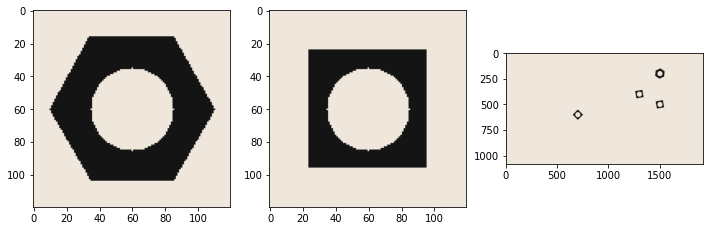

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (12,8))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

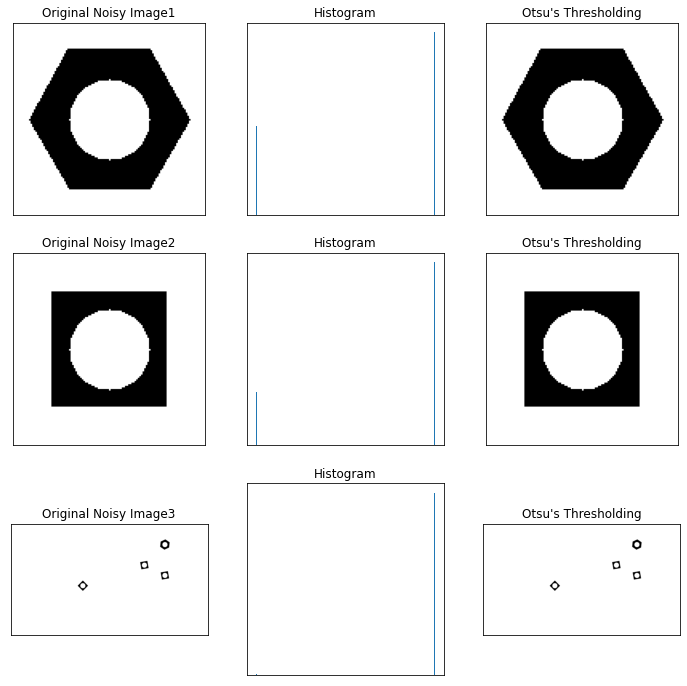

Automatic threshold for hexnut_template =  20.0
Automatic threshold for squarenut_template =  20.0
Automatic threshold for conveyorf100 =  20.0


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template_gray = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template_gray =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_gray =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [hexnut_template_gray, 0, th1,
          squarenut_template_gray, 0, th2,
          conveyor_f100_gray, 0, th3]
titles = ['Original Noisy Image1','Histogram',"Otsu's Thresholding",
            'Original Noisy Image2','Histogram',"Otsu's Thresholding",
          'Original Noisy Image3','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
print('Automatic threshold for hexnut_template = ', ret1)
print('Automatic threshold for squarenut_template = ', ret2)
print('Automatic threshold for conveyorf100 = ', ret3)

Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel. </br>
See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

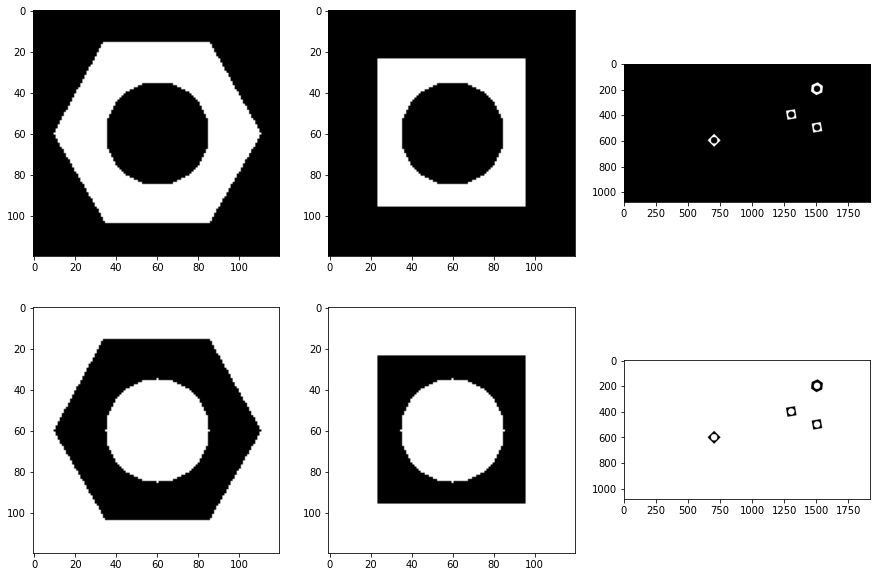

In [3]:
kernel = np.ones((3,3),np.uint8)
th1_ = np.invert(th1)
th2_ = np.invert(th2)
th3_ = np.invert(th3)
closed_hexnut_template = cv.morphologyEx(th1_, cv.MORPH_CLOSE, kernel)
closed_squarenut_template = cv.morphologyEx(th2_, cv.MORPH_CLOSE, kernel)
closed_conveyor_belt = cv.morphologyEx(th3_, cv.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(2,3,figsize =(15,10))
ax[0,0].imshow(closed_hexnut_template,'gray')
ax[0,1].imshow(closed_squarenut_template,'gray')
ax[0,2].imshow(closed_conveyor_belt,'gray')
ax[1,0].imshow(th1,'gray')
ax[1,1].imshow(th2,'gray')
ax[1,2].imshow(th3,'gray')
plt.show()

Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. </br>
Answer the following questions</br>
1) How many connected components are detected in each image?</br>
2) What are the statistics? Interpret these statistics.</br>
3) What are the centroids?</br>
<br>For the hexnut template, you should get the object area in pixel as approximately 4728.

In [4]:
connectivity = 8
output_hexnut = cv.connectedComponentsWithStats(closed_hexnut_template,connectivity, cv.CV_32S)
numLabels_hex = output_hexnut[0] 
labels_hex = output_hexnut[1]
stats_hex = output_hexnut[2]
centroids_hex = output_hexnut[3]

In [5]:
output_squarenut = cv.connectedComponentsWithStats(closed_squarenut_template, connectivity, cv.CV_32S)
numLabels_square = output_squarenut[0]
labels_square = output_squarenut[1]
stats_square = output_squarenut[2]
centroids_square = output_squarenut[3] 

output_conv = cv.connectedComponentsWithStats(closed_conveyor_belt,connectivity, cv.CV_32S)
numLabels_conv = output_conv[0]
labels_conv = output_conv[1]
stats_conv = output_conv[2]
centroids_conv = output_conv[3]

In [6]:
#number of connected components in each image
numLabels_hex , numLabels_square ,numLabels_conv 

(2, 2, 5)

Here we got 2 connected components in hexnut template and 2 in square nut template and 5 in convayor belt image. But actually it should be 1 , and 4 because the earlier includes the background label as well.<br>
Therefore it is, <br>
Hexnut = 1<br>
Squarenut = 1<br>
convayor belt = 4<br>

In [8]:
# Statistics
stats_hex , stats_square , stats_conv

(array([[   0,    0,  120,  120, 9672],
        [  10,   16,  101,   88, 4728]], dtype=int32),
 array([[    0,     0,   120,   120, 11173],
        [   24,    24,    72,    72,  3227]], dtype=int32),
 array([[      0,       0,    1920,    1080, 2059646],
        [   1454,     150,      92,     100,    4636],
        [   1259,     359,      82,      82,    3087],
        [   1459,     459,      82,      82,    3087],
        [    650,     550,     101,     101,    3144]], dtype=int32))

Statistics are an array for each label that contains <br>
(top left corner x coordinate, top left corner y coordinate, bottom right corner x coordinate , bottom right corner y coordinate, pixel area)

In [9]:
# Centroids
centroids_hex , centroids_square, centroids_conv

(array([[59.33684864, 59.63513234],
        [59.83375635, 59.22356176]]),
 array([[59.5875772 , 59.5875772 ],
        [59.19677719, 59.19677719]]),
 array([[ 957.36323524,  540.44416273],
        [1499.24201898,  199.28515962],
        [1299.18302559,  399.18302559],
        [1499.18302559,  499.18302559],
        [ 700.        ,  600.        ]]))

Centroids contain the coordinate of centroid of each connected component label

Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.</br>
Display these contours.

In [7]:
ret, thresh = cv.threshold(th3_, 127, 255, 0)
contours_convayer, hierarchy_convayer = cv.findContours(th3_, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

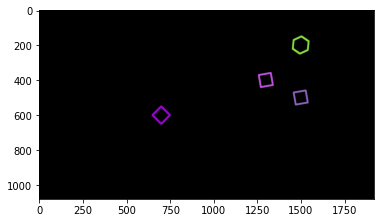

In [8]:
import random
random.seed(12345)
img = np.zeros((1080,1920,3),dtype=np.uint8)
for i in range(len(contours_convayer)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256)) 
    cv.drawContours(img, contours_convayer, i, color,10, cv.LINE_8, hierarchy_convayer,0)
plt.figure()
plt.imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))

In [9]:
ret2, thresh2 = cv.threshold(th2_, 127, 255, 0)
contours_squarenut, hierarchy_squarenut = cv.findContours(th2_, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

ret1, thresh1 = cv.threshold(th1_, 127, 255, 0)
contours_hexnut, hierarchy_hexnut = cv.findContours(th1_, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [10]:
def counting(contours_convayer,contours_hexnut,contours_squarenut):
    count_square = 0
    for i in range(len(contours_squarenut)):
        for j in range(len(contours_convayer)):
            ret = cv.matchShapes(contours_convayer[j],contours_squarenut[i],1,0.0)
            if ret < 0.01:
                count_square +=1
    count_hex = 0
    for i in range(len(contours_hexnut)):
        for j in range(len(contours_convayer)):
            ret = cv.matchShapes(contours_convayer[j],contours_hexnut[i],1,0.0)
            if ret < 0.01:
                count_hex +=1
    return ( count_hex, count_square)


In [11]:
count_hex, count_square = counting(contours_convayer,contours_hexnut,contours_squarenut)

<h3>Detecting Objects on a Synthetic Conveyor</h3>
In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

In [39]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

Current Frame:  116


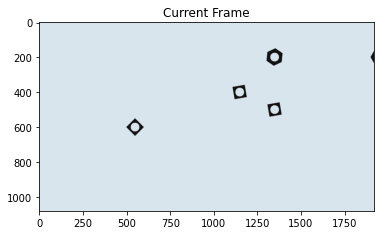

Count in the current frame:  4
Total count upto the current frame:  4


In [23]:
# Your code here.
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
frame_array = [] 
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

# Writing the video
shape = (1080, 1920, 3)
frame_and_count = [] 
# Your code here
for i in range(len(frame_array)):
    gray_frame = cv.cvtColor(frame_array[i], cv.COLOR_BGR2GRAY)
    thresh_frame , binary_frame_ = cv.threshold(gray_frame,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
    binary_frame = np.invert(binary_frame_)
    closed_binary_frame = cv.morphologyEx(binary_frame, cv.MORPH_CLOSE, kernel)
    contours_frame, hierarchy = cv.findContours(binary_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    hex_count , square_count = counting(contours_frame,contours_hexnut,contours_squarenut)
    total_count = hex_count + square_count
    frame_and_count.append(total_count)

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

count_upto = 1
for i in range(0,len(frame_array)-1):
    if frame_and_count[i+1] > frame_and_count[i]:
        count_upto += (frame_and_count[i+1] - frame_and_count[i])
print('Current Frame: ', str(len(frame_array)))
plt.imshow(frame_array[-1],'gray')
plt.title('Current Frame')
plt.show()
print('Count in the current frame: ' , frame_and_count[-1])
print('Total count upto the current frame: ', count_upto)